<a href="https://colab.research.google.com/github/georgsmeinung/rn1-perceptron/blob/main/RN-Clase02/01_funcion_y_derivada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la práctica y el cuestionario la mayoría de los cálculos pueden realizarse de forma manual.
Este script es una guía simplificada para ayudar en la resolución de los ejercicios.


## 🔧 Definición de Funciones


In [1]:
### Definición de la función y sus derivadas parciales

# Definimos la función principal f(x,y)
def f(x, y):
    return x / (2*x**2 + 3*y**2 + 1)

# Derivada parcial de f con respecto a x
def df_dx(x, y):
    numerador = -4*x**2 + (2*x**2 + 3*y**2 + 1)
    denominador = (2*x**2 + 3*y**2 + 1)**2
    return numerador / denominador

# Derivada parcial de f con respecto a y
def df_dy(x, y):
    numerador = -6*x*y
    denominador = (2*x**2 + 3*y**2 + 1)**2
    return numerador / denominador

def gradiente(x, y):
    """Retorna el vector gradiente en el punto (x, y)"""
    return ( df_dx(x, y), df_dy(x, y) )

## 💡 Ejemplo de Uso


### Ejemplo simple para cálculo de un valor

In [2]:
print("Función f(x,y): x/(2x² + 3y² + 1)")
print("Derivada parcial respecto a x:", "-4x²/(2x² + 3y² + 1)² + 1/(2x² + 3y² + 1)")
print("Derivada parcial respecto a y:", "-6xy/(2x² + 3y² + 1)²")

# Evaluar en un punto específico
x_ejemplo, y_ejemplo = 1, 1
print(f"\nEvaluación en x={x_ejemplo}, y={y_ejemplo}:")
print(f"f({x_ejemplo}, {y_ejemplo}) = {f(x_ejemplo, y_ejemplo):.4f}")
print(f"∂f/∂x({x_ejemplo}, {y_ejemplo}) = {df_dx(x_ejemplo, y_ejemplo):.4f}")
print(f"∂f/∂y({x_ejemplo}, {y_ejemplo}) = {df_dy(x_ejemplo, y_ejemplo):.4f}")


Función f(x,y): x/(2x² + 3y² + 1)
Derivada parcial respecto a x: -4x²/(2x² + 3y² + 1)² + 1/(2x² + 3y² + 1)
Derivada parcial respecto a y: -6xy/(2x² + 3y² + 1)²

Evaluación en x=1, y=1:
f(1, 1) = 0.1667
∂f/∂x(1, 1) = 0.0556
∂f/∂y(1, 1) = -0.1667


### Ejemplo Generando de Tabla de Valores

In [3]:

print("\nTabla de valores de f(x,y):")
print("x\ty\tf(x,y)")
for x in [-2, -1, 0, 1, 2]:
    for y in [-2, -1, 0, 1, 2]:
        print(f"{x}\t{y}\t{f(x, y):.3f}")


Tabla de valores de f(x,y):
x	y	f(x,y)
-2	-2	-0.095
-2	-1	-0.167
-2	0	-0.222
-2	1	-0.167
-2	2	-0.095
-1	-2	-0.067
-1	-1	-0.167
-1	0	-0.333
-1	1	-0.167
-1	2	-0.067
0	-2	0.000
0	-1	0.000
0	0	0.000
0	1	0.000
0	2	0.000
1	-2	0.067
1	-1	0.167
1	0	0.333
1	1	0.167
1	2	0.067
2	-2	0.095
2	-1	0.167
2	0	0.222
2	1	0.167
2	2	0.095


## 📊 Visualización Gráfica

### Gráfico simple de la función y curva de nivel con Matplotlib

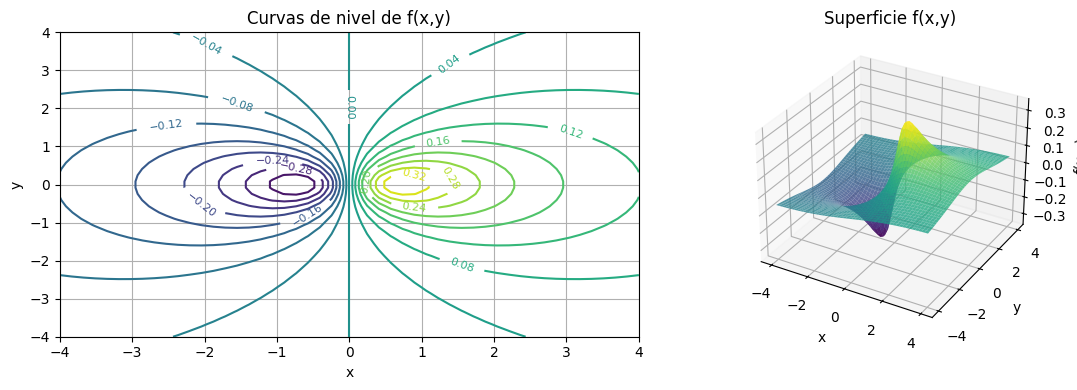

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Preparamos datos para graficar
x_vals = np.linspace(-4, 4, 50)
y_vals = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Gráfico 2D simple
plt.figure(figsize=(12, 4))

# Gráfico de contorno
plt.subplot(1, 2, 1)
contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8)
plt.title("Curvas de nivel de f(x,y)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Gráfico 3D básico
plt.subplot(1, 2, 2, projection='3d')
surface = plt.gca().plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
plt.title("Superficie f(x,y)")
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_zlabel('f(x,y)')

plt.tight_layout()
plt.show()

### Gráfico Integractivo con curvas de Nivel con Plotly

In [5]:
import plotly.graph_objects as go

# Gráfico interactivo con Plotly
fig = go.Figure(data=go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.9))
fig.update_layout(
    title='Gráfico Interactivo',
    title_x=0.5,  # Centrado horizontal
    scene=dict(zaxis_title='Z', yaxis_title='Y')
)
fig.show()

### Gradiente en un Punto

In [6]:
x0, y0 = 1, 1
grad_P0 = gradiente(x0, y0)
f_P0 = f(x0, y0)

print(f"Punto inicial P₀ = ({x0}, {y0})")
print(f"f(P₀) = {f_P0:.6f}")
print(f"∂f/∂x(P₀) = {grad_P0[0]:.6f}")
print(f"∂f/∂y(P₀) = {grad_P0[1]:.6f}")
print(f"\n∇f(P₀) = ({grad_P0[0]:.6f}, {grad_P0[1]:.6f})")

Punto inicial P₀ = (1, 1)
f(P₀) = 0.166667
∂f/∂x(P₀) = 0.055556
∂f/∂y(P₀) = -0.166667

∇f(P₀) = (0.055556, -0.166667)


### Dirección de Crecimiento

In [7]:
# Punto de referencia para el cálculo
x0, y0 = 1, 1
grad_P0 = gradiente(x0, y0)
f_P0 = f(x0, y0)

print(f"∇f(P₀) = ({grad_P0[0]:.6f}, {grad_P0[1]:.6f})")
print("\nAnálisis de componentes:")
grad_x_sube = grad_P0[0] > 0
grad_y_sube = grad_P0[1] > 0

dir_x = "disminuir" if grad_x_sube else "incrementar"
dir_y = "disminuor" if grad_y_sube else "incrementar"

print(f"  - Componente x: {grad_P0[0]:9.6f} {dir_x} x")
print(f"  - Componente y: {grad_P0[1]:9.6f} {dir_y} y")

print("\nOpciones:")
print("  i.   Incrementar x e y")
print("  ii.  Disminuir x e y")
print("  iii. Incrementar x y disminuir y")
print("  iv.  Disminuir x e incrementar y")

∇f(P₀) = (0.055556, -0.166667)

Análisis de componentes:
  - Componente x:  0.055556 disminuir x
  - Componente y: -0.166667 incrementar y

Opciones:
  i.   Incrementar x e y
  ii.  Disminuir x e y
  iii. Incrementar x y disminuir y
  iv.  Disminuir x e incrementar y


### Dirección de decrecimiento
La dirección de decrecimiento se obtiene sumando el gradiente al punto

In [8]:
f_P0 = f(x0, y0)

alpha = 0.5
P1_ascenso = (x0 + alpha * grad_P0[0], y0 + alpha * grad_P0[1])

print(f"α = {alpha}")
print(f"P₁ = P₀ + α·∇f(P₀)")
print(f"P₁ = ({x0}, {y0}) + {alpha}·({grad_P0[0]:.6f}, {grad_P0[1]:.6f})")
print(f"P₁ = ({P1_ascenso[0]:.6f}, {P1_ascenso[1]:.6f})")

f_P1_ascenso = f(P1_ascenso[0], P1_ascenso[1])
print(f"\nf(P₀) = {f_P0:.6f}")
print(f"f(P₁) = {f_P1_ascenso:.6f}")
print(f"Incremento: {f_P1_ascenso - f_P0:.6f} {'> 0 la función creció' if f_P1_ascenso > f_P0 else '< 0 la función decreció'}")


α = 0.5
P₁ = P₀ + α·∇f(P₀)
P₁ = (1, 1) + 0.5·(0.055556, -0.166667)
P₁ = (1.027778, 0.916667)

f(P₀) = 0.166667
f(P₁) = 0.182441
Incremento: 0.015774 > 0 la función creció


### Decenso del Gradiente

In [9]:
def descenso_gradiente(x_init, y_init, alpha=0.1, max_iter=1000, tol=1e-6):
    """Algoritmo de descenso de gradiente para encontrar mínimo"""
    x, y = x_init, y_init
    historial = [(x, y, f(x, y))] # guardamos el historial

    for i in range(max_iter):
        grad = gradiente(x, y)
        x_new = x - alpha * grad[0] # Se resta el gradiente para le mínimo, se suma para el máximo
        y_new = y - alpha * grad[1]

        # Verificar convergencia
        if abs(x_new - x) < tol and abs(y_new - y) < tol:
            print(f"Convergencia alcanzada en iteración {i}")
            break

        x, y = x_new, y_new
        if i % 100 == 0 or i < 10:
            historial.append((x, y, f(x, y)))

    return x, y, f(x, y), historial

x_min, y_min, f_min, hist_min = descenso_gradiente(x0, y0, alpha=0.1, max_iter=1000)

print(f"\nPunto inicial: ({x0}, {y0})")
print(f"f inicial: {f_P0:.6f}")
print(f"\nPrimeras iteraciones:")
for i, (x, y, fval) in enumerate(hist_min[:5]):
    print(f"  Iter {i*100 if i > 0 else 0}: ({x:.4f}, {y:.4f}), f = {fval:.6f}")

print(f"\n{'='*50}")
print(f"RESULTADO - MÍNIMO:")
print(f"Ubicación: ({x_min:.6f}, {y_min:.6f})")
print(f"Valor: f_min = {f_min:.6f}")

Convergencia alcanzada en iteración 415

Punto inicial: (1, 1)
f inicial: 0.166667

Primeras iteraciones:
  Iter 0: (1.0000, 1.0000), f = 0.166667
  Iter 100: (0.9944, 1.0167), f = 0.163596
  Iter 200: (0.9887, 1.0331), f = 0.160586
  Iter 300: (0.9828, 1.0493), f = 0.157635
  Iter 400: (0.9767, 1.0652), f = 0.154744

RESULTADO - MÍNIMO:
Ubicación: (-0.707121, 0.000000)
Valor: f_min = -0.353553
